# Boulton (1963) interpretation 
 
This notebook demonstrates how to use **OpenHyTest** for the constant rate pumping test interpretation of the Boulton (1982) solution for an unconfined aquifer with delayed yield.

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data

The data set for this example comes from the following reference: 

G. de Marsily, cours DEA Paris 6, "Aquifère cétier de Nefza, Tunisie". Piezometer A3

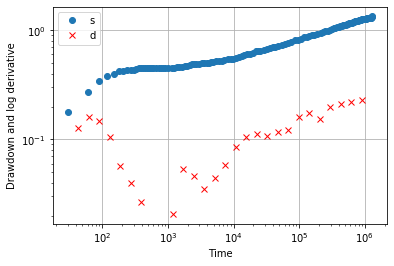

In [2]:
data = pd.read_csv('../data/blt_ds1.txt', header=None, sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(data)
test.hyclean()
test.diagnostic()


## Model 

Draw a series of type curves of Boulton (1963) for different ...

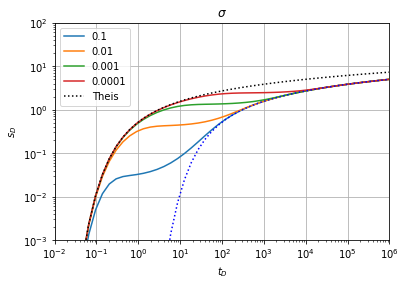

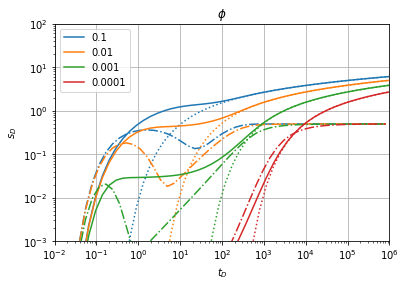

In [3]:
rq = ht.Boulton()
rq.plot_typecurve()

## Model fitting

In [4]:
blt = ht.Boulton(df=test.df, Q=0.030, r=20, rw=0.1)
blt.guess_params()


array([3.34182604e-01, 3.00000000e+01, 2.00993297e+02, 1.00000000e-04])

Please, first specifiy the number of coefficient used for the inversion.


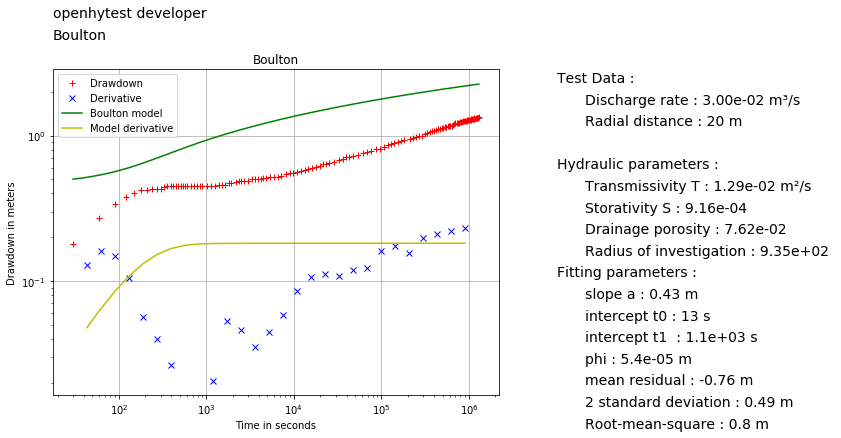

In [5]:
blt.p = [0.4277, 12.69, 1068, 5.397e-5]
blt.rpt(fitmethod='nofit')

Please, first specifiy the number of coefficient used for the inversion.


../openhytest/modelclasses.py:2387: RuntimeWarning: invalid value encountered in sqrt
  return kv(0, np.sqrt(pd + self.x[1] * pd / (self.x[0] * (pd + self.x[1])))) / pd


`ftol` termination condition is satisfied.
Function evaluations 62, initial cost 4.2083e+01, final cost 1.7405e-02, first-order optimality 3.62e-05.


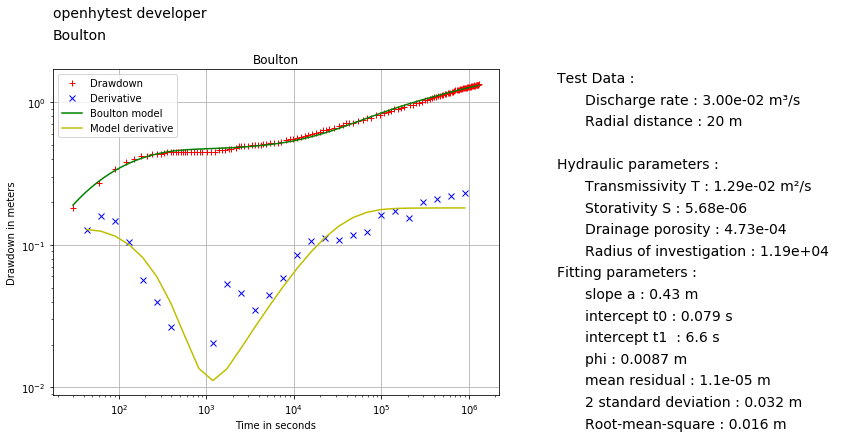

In [6]:
blt.rpt()

Please, first specifiy the number of coefficient used for the inversion.
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 1.7405e-02, final cost 1.7405e-02, first-order optimality 1.91e-05.


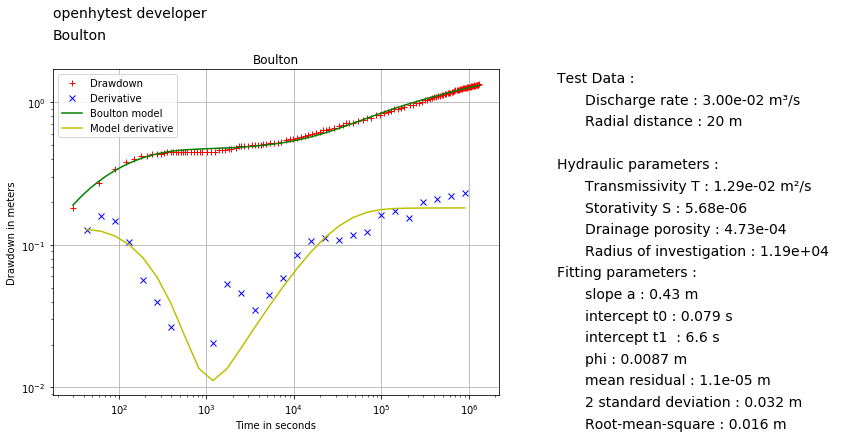

In [7]:
blt.fitmethod = 'lm'
blt.rpt()